### Demo notebook for model trained on NIH Chest X-rays dataset

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import efficientnet.tfkeras
import numpy as np
import pandas as pd
import cv2
from tensorflow.keras.models import load_model
from keras.utils.data_utils import get_file
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


IMAGE_SIZE = 224

classes = ['Cardiomegaly', 'Emphysema', 'Effusion', 
           'Hernia', 'Infiltration', 'Mass', 
           'Nodule', 'Atelectasis', 'Pneumothorax', 
           'Pleural Thickening', 'Pneumonia', 'Fibrosis', 
           'Edema', 'Consolidation']


def preprocess_image(uploaded_file):
    # Load image
    img_array = np.array(Image.open(uploaded_file))
    # Normalize to [0,1]
    img_array = img_array.astype('float32')
    img_array /= 255
    # Check that images are 2D arrays
    if len(img_array.shape) > 2:
        img_array = img_array[:, :, 0]
    # Convert to 3-channel
    img_array = np.stack((img_array, img_array, img_array), axis=-1)
    # Convert to array
    img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
    return img_array


def get_model():
    URL = "https://github.com/hasibzunair/cxr-predictor/releases/latest/download/NIH_EfficientNetB1_res224.h5"
    weights_path = get_file(
               "NIH_EfficientNetB1_res128.h5",
               URL)
    model = load_model(weights_path, compile = False)
    return model

def make_prediction(file):
    # Preprocess input image
    image = preprocess_image(file)
    # Add batch axis
    image = np.expand_dims(image, 0)
    # Predict
    predictions = model.predict(image)
    return predictions

Using TensorFlow backend.


In [2]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b1 (Model)      (None, 7, 7, 1280)        6575232   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1311744   
_________________________________________________________________
dense_1 (Dense)              (None, 14)                14350     
Total params: 7,901,326
Trainable params: 7,839,278
Non-trainable params: 62,048
_________________________________________________________________


In [3]:
uploaded_file = "/home/hasib/Desktop/edema.jpeg"

In [4]:
img = np.array(Image.open(uploaded_file))

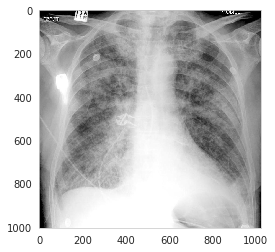

In [5]:
plt.imshow(img, cmap='gray')
plt.grid(False)

In [6]:
predictions = make_prediction(uploaded_file)

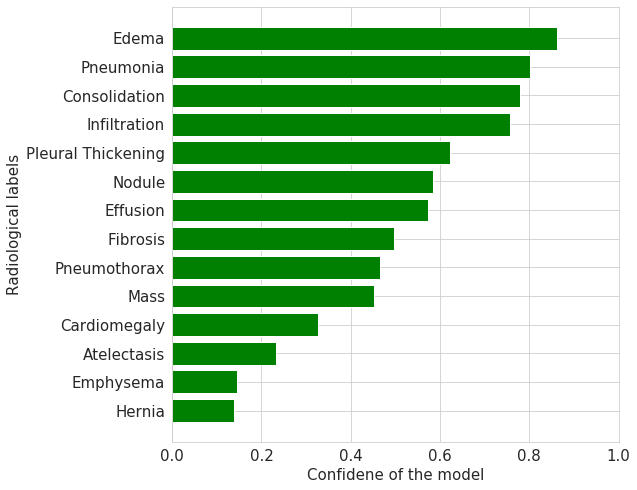

In [7]:
df = pd.DataFrame({'classes' : classes, 'predictions' : predictions[0]})
df = df.sort_values('predictions')

plt.figure(figsize=(8,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 1)
plt.barh(df['classes'], df['predictions'], color='green')
plt.xlabel('Confidene of the model', fontsize=15)
plt.ylabel('Radiological labels', fontsize=15)
plt.show()